In [ ]:
import torch
import torchvision

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

# Hparams

In [ ]:
epochs = 20
input_dim = 784
output_dim = 10

batch_size_train = 64
batch_size_test = 1000

lr_rate = 0.01

# Prepare dataloaders

In [ ]:
train_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('data', train=True, download=True,
                                                                      transform=torchvision.transforms.Compose([
                                                                          torchvision.transforms.ToTensor(),
                                                                          torchvision.transforms.Normalize((0.1307,), (0.3081,))])),
                                           batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(torchvision.datasets.MNIST('data', train=False, download=True,
                                                                     transform=torchvision.transforms.Compose([
                                                                         torchvision.transforms.ToTensor(),
                                                                         torchvision.transforms.Normalize((0.1307,), (0.3081,))])),
                                          batch_size=batch_size_test, shuffle=True)

# Define logistic regression model

In [4]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = self.linear(x)
        return outputs

# Learning

In [8]:
def learn(model):
    
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)

    # calculate Accuracy
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = Variable(images.view(-1, 28*28))
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total+= labels.size(0)
        correct+= (predicted == labels).sum()
    accuracy = 100 * correct/total
    print("At birth accuracy: {} %".format(accuracy.item()))
    
    last_acc = 0.
    for epoch in range(int(epochs)):
        for i, (images, labels) in enumerate(train_loader):
            images = Variable(images.view(-1, 28 * 28))
            labels = Variable(labels)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
        # calculate Accuracy
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = Variable(images.view(-1, 28*28))
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total+= labels.size(0)
            correct+= (predicted == labels).sum()
        accuracy = 100 * correct/total
        print("After epoch: {}. Loss: {}. Accuracy: {}%.".format(epoch, loss.item(), accuracy))
        
        if last_acc > accuracy:
            return last_acc.item()
        else:
            last_acc = accuracy
    return last_acc.item()
            
            
model = LogisticRegression(input_dim, output_dim)
logistic_acc = learn(model)
print('Logistic regression model acc: {} %'.format(logistic_acc))

At birth accuracy: 11 %
After epoch: 0. Loss: 0.3856881856918335. Accuracy: 90%.
After epoch: 1. Loss: 0.3124147653579712. Accuracy: 91%.
After epoch: 2. Loss: 0.1901261806488037. Accuracy: 91%.
After epoch: 3. Loss: 0.1867780089378357. Accuracy: 91%.
After epoch: 4. Loss: 0.2631455659866333. Accuracy: 91%.
After epoch: 5. Loss: 0.5071932673454285. Accuracy: 92%.
After epoch: 6. Loss: 0.14333565533161163. Accuracy: 91%.
Logistic regression model acc: 92 %


# Barabasi model

In [9]:
class BarabasiRegression(torch.nn.Module):
    def __init__(self, input_dim, genes_dim, output_dim):
        super(BarabasiRegression, self).__init__()
        self.xi = torch.nn.Linear(input_dim, genes_dim, bias=False)
        self.o = torch.nn.Linear(genes_dim, genes_dim, bias=False)
        self.xo = torch.nn.Linear(genes_dim, output_dim, bias=True)
        self.xo.requires_grad = False

    def forward(self, x):
        outputs = self.xo(self.o(self.xi(x)))
        return outputs

In [13]:
model_b1 = BarabasiRegression(input_dim, 1, output_dim)
barabasi_1 = learn(model_b1)
print('Barabasi model with {} genes acc: {} %'.format(1, barabasi_1))

At birth accuracy: 7 %
After epoch: 0. Loss: 1.7259771823883057. Accuracy: 27%.
After epoch: 1. Loss: 1.6338917016983032. Accuracy: 30%.
After epoch: 2. Loss: 1.5750901699066162. Accuracy: 32%.
After epoch: 3. Loss: 1.5732593536376953. Accuracy: 33%.
After epoch: 4. Loss: 1.564858317375183. Accuracy: 34%.
After epoch: 5. Loss: 1.527112364768982. Accuracy: 34%.
After epoch: 6. Loss: 1.8827240467071533. Accuracy: 36%.
After epoch: 7. Loss: 1.5211623907089233. Accuracy: 36%.
After epoch: 8. Loss: 1.5618678331375122. Accuracy: 37%.
After epoch: 9. Loss: 1.753145456314087. Accuracy: 38%.
After epoch: 10. Loss: 1.55521821975708. Accuracy: 38%.
After epoch: 11. Loss: 1.619829535484314. Accuracy: 37%.
Barabasi model with 1 genes acc: 38 %


In [14]:
barabasi_accuracies = []
for genes_no in range(1, 9):
    barabasi_acc = learn(BarabasiRegression(input_dim, genes_no, output_dim))
    barabasi_accuracies.append(barabasi_acc)

At birth accuracy: 10 %
After epoch: 0. Loss: 1.8842389583587646. Accuracy: 26%.
After epoch: 1. Loss: 1.8064672946929932. Accuracy: 23%.
At birth accuracy: 11 %
After epoch: 0. Loss: 1.4831790924072266. Accuracy: 46%.
After epoch: 1. Loss: 1.2193195819854736. Accuracy: 53%.
After epoch: 2. Loss: 1.0885307788848877. Accuracy: 57%.
After epoch: 3. Loss: 1.0486156940460205. Accuracy: 58%.
After epoch: 4. Loss: 1.279468297958374. Accuracy: 60%.
After epoch: 5. Loss: 0.9607208967208862. Accuracy: 61%.
After epoch: 6. Loss: 1.3377606868743896. Accuracy: 60%.
At birth accuracy: 10 %
After epoch: 0. Loss: 1.1107027530670166. Accuracy: 70%.
After epoch: 1. Loss: 1.0123831033706665. Accuracy: 75%.
After epoch: 2. Loss: 0.5513543486595154. Accuracy: 76%.
After epoch: 3. Loss: 0.6114587187767029. Accuracy: 77%.
After epoch: 4. Loss: 0.8947972059249878. Accuracy: 77%.
After epoch: 5. Loss: 0.8547793030738831. Accuracy: 77%.
After epoch: 6. Loss: 0.628029465675354. Accuracy: 77%.
After epoch: 7. Lo

# Visualization

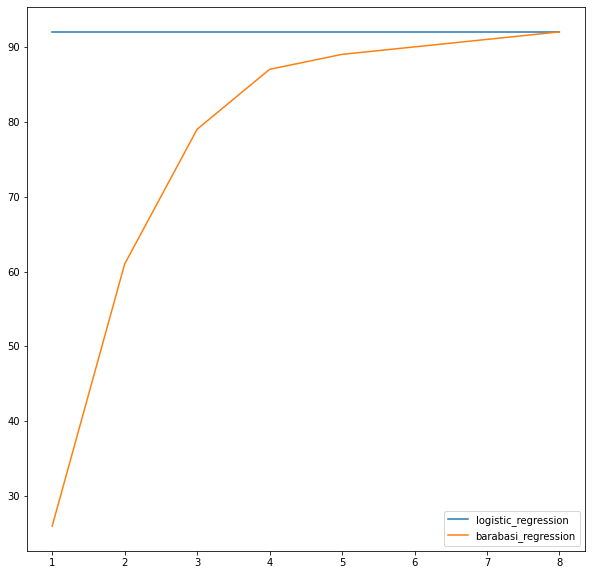

In [24]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(np.arange(1, 9), [logistic_acc]*8, label='logistic_regression')
plt.plot(np.arange(1, 9), barabasi_accuracies, label='barabasi_regression')
plt.legend()
plt.show()